# https://www.youtube.com/watch?v=iRD65OsBWoE

In [4]:
!pip install apriori apyori

  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2477 sha256=3a384d74688e7453cf98a30652de401da4bc4bf39dd8c088e8fe9e05031b760a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5b\68\dc\04db1838d64a3011a9b737e6f458894dc1f5cbadd128d54c1c
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=9b0b0f8fbb0f3e055007bc412602467eb5ca1bd7ba03ce9418c32b9ce061824b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apriori apyori


In [5]:
!pip install networkx

In [1]:
import json
#Load in cookie
data1 = json.load(open('2.JSON자료\혜화역1번출구_.json', 'rb'))
data2 = json.load(open('2.JSON자료\혜화역2번출구_.json', 'rb'))
data3 = json.load(open('2.JSON자료\혜화역3번출구_.json', 'rb'))
data4 = json.load(open('2.JSON자료\혜화역4번출구_.json', 'rb'))
hashtags1 = data1['hashtag']
hashtags2 = data2['hashtag']
hashtags3 = data3['hashtag']
hashtags4 = data4['hashtag']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [8]:
#한글폰드 적용
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="1.font\malgunbd.ttf").get_name()
rc('font', family=font_name)

# 1번출구

In [9]:
#목적에 맞지 않은 해시태그 제거
stopwords1 = ['나몰라패밀리', '고장환', '핫쇼']
index1 = []
for stop in stopwords1:
    for i in range(len(hashtags1)):
        for tag in hashtags1[i]:
            if stop in tag:
                if i not in index1:
                    index1.append(i)
            else:
                pass

In [10]:
new_hashtags1 = []
for i in range(len(hashtags1)):
    if i in index1:
        pass
    else:
        new_hashtags1.append(hashtags1[i])

In [11]:
station = '#혜화역1번출구'
location = '#혜화역'
for i in new_hashtags1:
    if station in i:
        i.remove(station)
    if location in i:
        i.remove(location)
print(new_hashtags1)

[['#꽃집', '#오픈', '#오픈이벤트중', '#도보5분', '#헤화동맛집', '#혜화역데이트', '#대학로데이트', '#대학로꽃집', '#혜화꽃집', '#성북동꽃집', '#배우꽃다발', '#연극', '#연우소극장', '#연우무대', '#jcc아트센터', '#연주회꽃다발', '#몬드포레', '#mondforet'], ['#술밑양조장', '#우리술전문점', '#대학로맛집', '#대학로주점', '#토란막걸리', '#시향가', '#두부김치'], ['#오레노카츠_대학로점', '#D', '#첫오픈', '#혜화', '#오픈', '#혜화맛집', '#데이트맛집', '#대학로맛집', '#연극맛집', '#성수', '#성수맛집', '#돈까스맛집', '#돈카츠맛집', '#성곽길데이트', '#성균관대맛집', '#서울대병원', '#성대맛집', '#일상', '#소통'], ['#꽃집', '#혜화꽃집몬드포레', '#혜화동', '#대학로데이트', '#대학로꽃집', '#혜화꽃집', '#성북동꽃집', '#혜화맛집', '#혜화카페', '#배우꽃다발', '#연극', '#연우소극장', '#연우무대', '#jcc아트센터', '#연주회꽃다발', '#몬드포레', '#mondforet'], ['#연극', '#에쿠우스', '#시어터플러스', '#추석선물🍁', '#추석에는_관극이죠😎', '#9월호', '#류덕환', '#오승훈', '#서영주', '#장두이', '#안석환', '#이석준', '#스콘1관', '#서경대학교공연예술센터', '#연극', '#뮤지컬', '#클래식', '#발레', '#영화', '#전시', '#가족공연', '#공연문화월간지', '#THEATREPLUS', '#THEATRE', '#시어터', '#씨어터플러스', '#씨어터', '#극장', '#공연잡지', '#추석선물', '#시어터플러스', '#에쿠우스', '#리그램완료', '#에쿠우스초대이벤트', '#에쿠우스', '#연극', '#류덕환', '#이석준', '#믿고보는배우', '#추석선물', '#씨어터플러스', '#팔로우', '#좋아요', '#리그

In [12]:
# 지지도, 신뢰도, 향상도 이상이면서 규칙의 크기가 2이하인 규칙을 추출
results1 = list(apriori(new_hashtags1,
            min_support=0.1,
            min_confidence=0.2,
            min_lift=5,
            max_length=2))
print(results1)

[RelationRecord(items=frozenset({'#기념일꽃다발', '#대학로꽃집'}), support=0.10267857142857142, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#기념일꽃다발'}), items_add=frozenset({'#대학로꽃집'}), confidence=0.9951923076923077, lift=7.5425101214574894), OrderedStatistic(items_base=frozenset({'#대학로꽃집'}), items_add=frozenset({'#기념일꽃다발'}), confidence=0.7781954887218044, lift=7.5425101214574894)]), RelationRecord(items=frozenset({'#기념일꽃다발', '#혜화꽃집'}), support=0.10267857142857142, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#기념일꽃다발'}), items_add=frozenset({'#혜화꽃집'}), confidence=0.9951923076923077, lift=7.746361746361747), OrderedStatistic(items_base=frozenset({'#혜화꽃집'}), items_add=frozenset({'#기념일꽃다발'}), confidence=0.7992277992277993, lift=7.746361746361748)]), RelationRecord(items=frozenset({'#동대문꽃집', '#대학로꽃집'}), support=0.10069444444444445, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#대학로꽃집'}), items_add=frozenset({'#동대문꽃집'}), confidence=0.7631578947368421, lift=7

In [13]:
columns = ['source','target','support']
network_df1 = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support라는 데이터 프레임의 컬럼으로 변환
for result in results1:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df1.columns)
        network_df1 = network_df1.append(series, ignore_index=True)
network_df1.head()

,source,target,support
0,#기념일꽃다발,#대학로꽃집,0.102679
1,#기념일꽃다발,#혜화꽃집,0.102679
2,#동대문꽃집,#대학로꽃집,0.100694
3,#대학로꽃집,#성균관대꽃집,0.104663
4,#성균관대학교,#대학로꽃집,0.100694


In [14]:
from collections import Counter
hashtag1 = sum(new_hashtags1,[])
count_tags1 = Counter(hashtag1)
print(count_tags1)

Counter({'#대학로': 1176, '#대학로맛집': 491, '#혜화': 445, '#러셔스스쿱스': 289, '#홈메이드아이스크림': 288, '#대학로꽃집': 267, '#혜화꽃집': 260, '#낙산공원': 224, '#혜화역꽃집': 218, '#해마티룸': 216, '#성북동꽃집': 213, '#성균관대꽃집': 212, '#혜화동꽃집': 211, '#기념일꽃다발': 209, '#이앙갤러리': 208, '#성균관대학교': 207, '#한성대': 206, '#한성대꽃집': 204, '#홍대아트센터': 204, '#성신여대꽃집': 204, '#동대문꽃집': 204, '#혜화맛집': 203, '#꽃바구니': 200, '#종로꽃집': 200, '#혜화역맛집': 189, '#성균관대': 188, '#연극': 177, '#대학로연극': 173, '#대학로카페': 155, '#대학로데이트': 154, '#혜화카페': 150, '#대학로데이트코스': 148, '#혜화역카페': 145, '#대학로아이스크림': 143, '#혜화역아이스크림': 142, '#혜화역데이트코스': 141, '#혜화아이스크림': 140, '#서울대학교': 140, '#연세대학교': 139, '#혜화동': 131, '#수제아이스크림': 131, '#lusciousscoops': 125, '#luscious__scoops': 124, '#성신여대근처맛집': 122, '#연극후엔': 121, '#혼카페☕️': 114, '#오늘은너로정했다': 112, '#시': 110, '#배달아이스크림': 109, '#독서하기좋은곳': 108, '#혜화역디져트': 107, '#연극보고': 106, '#대학로디져트': 105, '#혜화디져트': 101, '#먹스타그램': 99, '#홍차카페': 96, '#맞팔': 94, '#한성대근처맛집': 93, '#팔로우': 92, '#누가케이크': 92, '#분위기있는카페☕': 90, '#더울땐': 89, '#일상': 85, '#캐롯치즈케이크': 85, '#맛스타그램': 8

In [15]:
# 카운트한 해시태그 데이터 프레임으로 변환
node_df1 = pd.DataFrame(count_tags1.items(), columns=['node','nodesize'])
node_df1 = node_df1[node_df1['nodesize'] >= 200] #시각화의 편의를 위해 'nodesize' 200이하는 제거
node_df1.head()

,node,nodesize
7,#대학로꽃집,267
8,#혜화꽃집,260
9,#성북동꽃집,213
20,#대학로맛집,491
28,#혜화,445


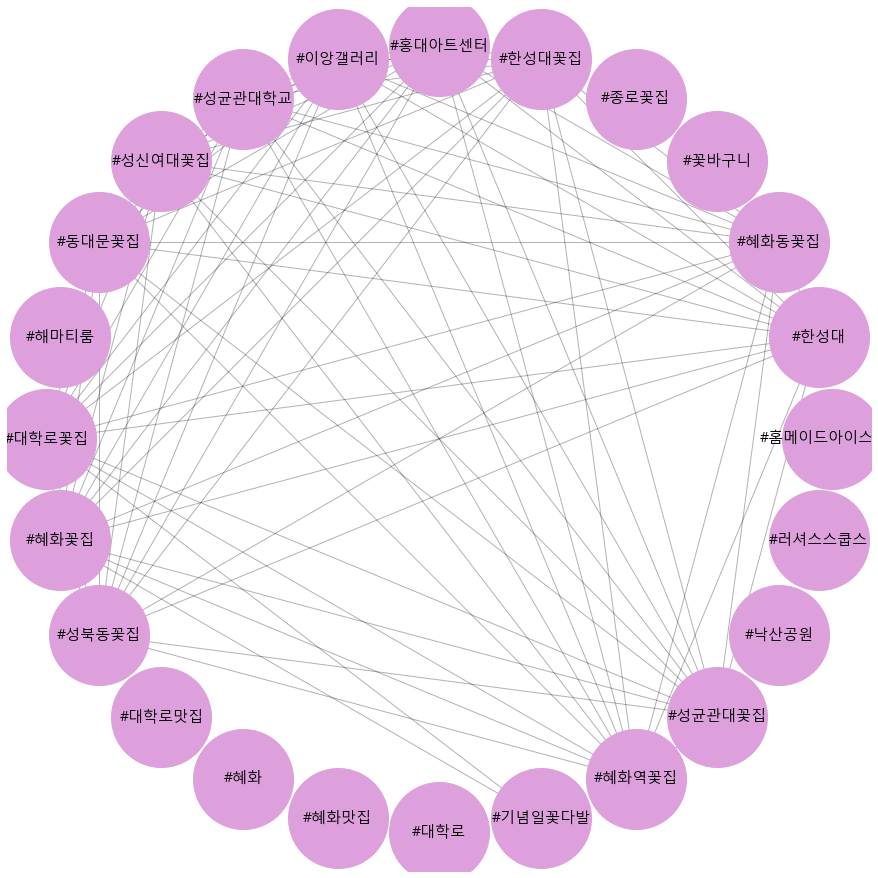

In [16]:
import networkx as nx
#그래프 크기 적용
fig = plt.figure(figsize=(12,12))

#networkx 그래프 객체를 생성
G = nx.Graph()

#node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 '노드' 역할을 하는 원을 생성
for index, row in node_df1.iterrows():
    G.add_node(row['node'],nodesize=row['nodesize'])
    
#network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df1.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'],row['support'])])
    
#그래프 디자인과 관련된 파라미터를 설정
# pos=nx.spring_layout(G, k=0.6, iterations=10)
pos=nx.shell_layout(G)
# sizes = [G.node['node']['nodesize']*25 for node in G]
nx.draw(G, pos=pos, alpha=0.3)

#그래프 크기 설정
nx.draw_networkx_nodes(G, pos=pos, node_size=10000, node_color="plum", node_shape='o')
# nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=15)

#그래프 출력
plt.gcf()
plt.axis('off')
plt.savefig("혜화역1번출구.png", bbox_inches="tight")
plt.show() 

# 2번출구

In [17]:
#아이돌 조공,포장실대여 등 목적에 맞지 않은 해시태그 제거
stopwords2 = ['아이돌', '조공', '대여', '도시락']
index = []
for stop in stopwords2:
    for i in range(len(hashtags2)):
        for tag in hashtags2[i]:
            if stop in tag:
                if i not in index:
                    index.append(i)
            else:
                pass

In [18]:
new_hashtags2 = []
for i in range(len(hashtags2)):
    if i in index:
        pass
    else:
        new_hashtags2.append(hashtags2[i])

In [19]:
station = '#혜화역2번출구'
location = '#혜화역'
for i in new_hashtags2:
    if station in i:
        i.remove(station)
    if location in i:
        i.remove(location)
print(new_hashtags2)

[['#스토리라이브러리', '#이야기', '#탐색', '#기록', '#기록스타그램', '#수집', '#발견', '#잡지', '#영화', '#책', '#책스타그램', '#1219세전용작업실', '#스라에서만나요'], ['#크로와상', '#크로와상샌드위치', '#티라미수', '#딸기티라미수', '#리코타치즈샐러드피자', '#떡갈비', '#마스터키즈쿠킹#키즈쿠킹#키즈베이킹#유아쿠킹클래스#아동요리교실#푸드테라피#편식개선#야채놀이#문화센터#방과후수업#원데이클래스#업데이트#엄마휴식#머랭쿠키#타마고산도#종로체험#혜화역2번출구#네이버예약가능#육아스타그램#기업특강#유치원단체'], ['#대학로달고나', '#오징어게임', '#오징어게임달고나', '#대학로', '#혜화'], ['#오징어게임', '#달고나', '#오징어게임달고나집', '#우산달고나', '#네모달고나', '#학교근처', '#한개에', '#3000원', '#ㅎㅋㅎㅋ#혜화역2번출구#뽑기의신'], ['None'], ['#이런', '환영#', '#스토리라이브러리', '#이야기', '#탐색', '#기록', '#기록스타그램', '#수집', '#발견', '#잡지', '#영화', '#책', '#책스타그램', '#1219세전용작업실', '#스라에서만나요', '#oo쓰러스라올래', '#출판', '#책만들기', '#기록물', '#갈무리', '#작가', '#편집자', '#오늘은나도작가', '#아무튼잡지', '#에디터', '#잡지에디터'], ['#스토리라이브러리', '#스라', '#스라러', '#기록', '#기록스타그램', '#이야기', '#탐색', '#수집', '#글', '#글스타그램', '#씀', '#씀스타그램', '#씀_일상적글쓰기', '#책', '#책스타그램', '#출판', '#독립출판', '#작가', '#10대작가', '#10대독립출판', '#트윈세대', '#트윈세대전용공간', '#1219세전용작업실'], ['#스토리라이브러리', '#스라', '#스라러', '#기록', '#기록스타그램', '#책', '#책스타그램', '#글', '#

In [20]:
# 지지도, 신뢰도, 향상도 이상이면서 규칙의 크기가 2이하인 규칙을 추출
results2 = list(apriori(new_hashtags2,
            min_support=0.1,
            min_confidence=0.2,
            min_lift=5,
            max_length=2))

In [21]:
columns = ['source','target','support']
network_df2 = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support라는 데이터 프레임의 컬럼으로 변환
for result in results2:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df2.columns)
        network_df2 = network_df2.append(series, ignore_index=True)
network_df2.head()

,source,target,support
0,#グレープフルーツ,#grapefruit,0.139217
1,#꿀자몽,#grapefruit,0.133002
2,#낙산공원,#grapefruit,0.151025
3,#대학로디저트,#grapefruit,0.151647
4,#대학로브런치,#grapefruit,0.137974


# 네트워크 그래프

In [22]:
from collections import Counter
hashtag2 = sum(new_hashtags2,[])
count_tags2 = Counter(hashtag2)
print(count_tags2)

Counter({'#대학로': 652, '#대학로디저트': 412, '#마로니에공원': 397, '#대학로카페': 339, '#혜화카페': 312, '#낙산공원': 302, '#대학로테라스': 302, '#동숭동카페': 288, '#자몽': 286, '#취향저격': 274, '#여심저격': 274, '#grapefruit': 247, '#グレープフルーツ': 225, '#대학로브런치': 225, '#꿀자몽': 224, '#드라이플라워': 220, '#대학로데이트': 208, '#루프탑': 199, '#대학로카페추천': 182, '#꿀자몽퐁당티': 153, '#혜화': 149, '#성대': 145, '#한성대': 144, '#방통대': 144, '#이화동': 142, '#취저카페': 140, '#연극': 122, '#딸기케이크': 105, '#dessert': 97, '#딸기': 93, '#strawberry': 92, '#성신여대': 92, '#빙수': 92, '#브런치': 82, '#슬로스텝': 82, '#스콘': 79, '#1219세전용작업실': 72, '#대학로분위기좋은카페': 72, '#slow_step': 60, '#slowstep': 56, '#대학로연극': 55, '#슬로우스텝': 55, '#이야기': 54, '#자몽타르트#대학로데이트': 52, '#시그니처': 50, '#대학로케익': 50, '#마스터키즈쿠킹#키즈쿠킹#키즈베이킹#유아쿠킹클래스#아동요리교실#푸드테라피#편식개선#야채놀이#문화센터#방과후수업#원데이클래스#업데이트#엄마휴식#머랭쿠키#타마고산도#종로체험#혜화역2번출구#네이버예약가능#육아스타그램#기업특강#유치원단체': 48, '#': 46, '#스토리라이브러리': 44, '#디저트': 44, '#꿀자몽에이드': 44, '#대학로자몽': 42, '#탐색': 41, '#기록': 41, '#책스타그램': 41, '#영화': 40, '#책': 40, '#케이크': 40, '#기록스타그램': 39, '#공연': 39, '#수제케이크': 39, '#대학

In [23]:
# 카운트한 해시태그 데이터 프레임으로 변환
node_df2 = pd.DataFrame(count_tags2.items(), columns=['node','nodesize'])
node_df2 = node_df2[node_df2['nodesize'] >= 200] #시각화의 편의를 위해 'nodesize' 200이하는 제거
node_df2.head()

,node,nodesize
23,#대학로,652
117,#대학로데이트,208
196,#낙산공원,302
263,#마로니에공원,397
2013,#대학로카페,339


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


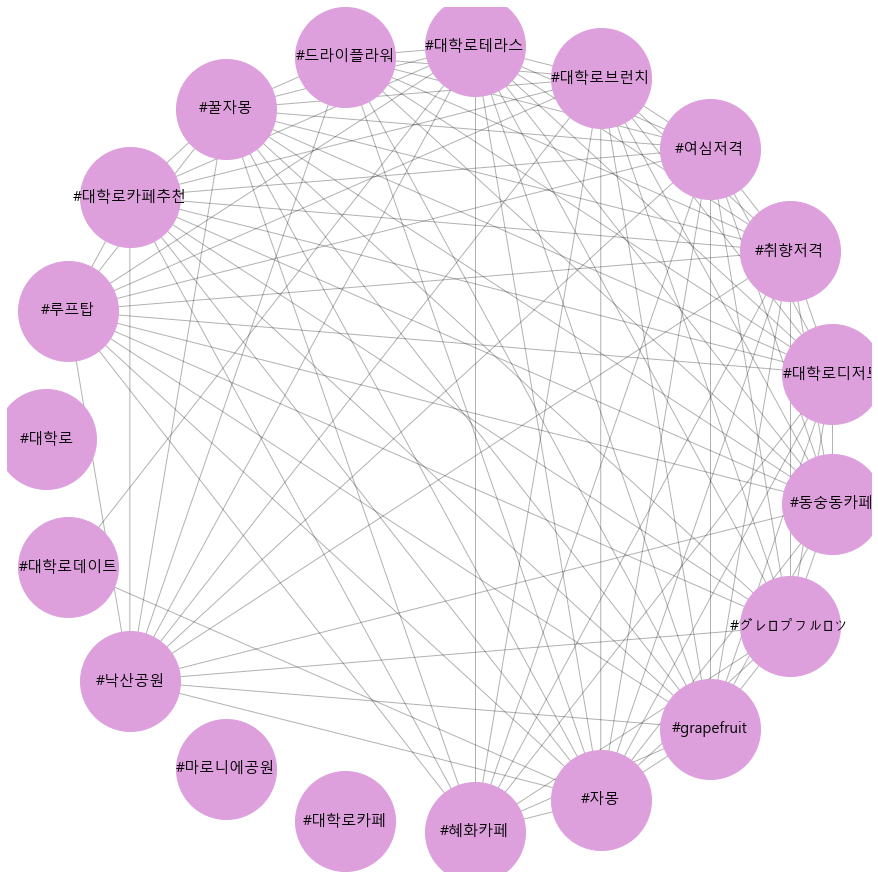

In [24]:
import networkx as nx
#그래프 크기 적용
plt.figure(figsize=(12,12))

#networkx 그래프 객체를 생성
G = nx.Graph()

#node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 '노드' 역할을 하는 원을 생성
for index, row in node_df2.iterrows():
    G.add_node(row['node'],nodesize=row['nodesize'])
    
#network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df2.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'],row['support'])])
    
#그래프 디자인과 관련된 파라미터를 설정
# pos=nx.spring_layout(G, k=0.6, iterations=10)
pos=nx.shell_layout(G)
# sizes = [G.node['node']['nodesize']*25 for node in G]
nx.draw(G, pos=pos, alpha=0.3)

#그래프 크기 설정
nx.draw_networkx_nodes(G, pos=pos, node_size=10000, node_color="plum", node_shape='o')
# nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=15)

#그래프 출력
ax = plt.gca()
plt.axis('off')
plt.savefig("혜화역2번출구.png", bbox_inches="tight")
plt.show() 

# 3번출구

In [61]:
station = '#혜화역3번출구'
location = '#혜화역'
for i in hashtags3:
    if station in i:
        i.remove(station)
    if location in i:
        i.remove(location)
print(hashtags3)

[['#항암가발', '#부분가발전문점입니다', '#헤어온', '#서울대병원', '#대학로미용실', '#항암가발', '#혜화역미용실', '#헤어온', '#서울대병원', '#썸머이벤트', '#컬러이벤트', '#옴브레', '#스마트본드', '#로레알스마트본드', '#대학로미용실', '#낭만적시간속에서', '#혜화역미용실', '#서울대병원에서머리하기', '#병원에서염색하기', '#서울대병원에서샴푸하기', '#항암가발전문점', '#두피전문점💆\u200d', '#칼라잘하는미용실', '#현정디자이너', '#서울대병원미용실', '#입원환자샴푸', '#보호자머리하기', '#연중무휴', '#두피케어전문점'], ['#크래프트밈', '#한옥펍', '#대학로', '#대학로', '#대학로', '#수제버거', '#대학로', '#크래프트', '#혜화역맛집', '#대학로데이트맛집'], ['#궁금한_옆테이블', '#학림커피', '#대학로', '#혜화', '#대학로카페', '#혜화카페', '#혜화역카페', '#혜화역데이트', '#대학로학림다방', '#비엔나', '#비엔나커피', '#비엔나커피맛집', '#생강밀크티', '#학림', '#커피맛집', '#카페투어', '#카페스타그램', '#혜화데이트', '#대학로데이트', '#서울시미래유산', '#서울여행', '#분위기카페', '#60년전통', '#since1956', '#레트로감성', '#레트로카페'], ['#오도레D', '#대학로맛집👍', '#대학로맛집', '#오도레', '#오도레d', '#파스타맛집', '#와인스타그램', '#스테이크맛집', '#대학로찐맛집', '#혜화역맛집'], ['#첫명함'], ['#혜화', '#대학로', '#한옥카페', '#매우숨겨져있음', '#서화카페', '#서화카페고양이', '#고먐미😻'], ['#20210207', '#자부타임', '#미도인대학로', '#오후홍콩', '#대학로', '#혜화동', '#친구스타그램', '#우정스타그램', '#애엄마들', '#아들엄마그램', '#유부녀그램', '#유부녀셋'], ['#대학로',

In [225]:
# 지지도, 신뢰도, 향상도 이상이면서 규칙의 크기가 3이하인 규칙을 추출
results3 = list(apriori(hashtags3,
            min_support=0.1,
            min_confidence=0.2,
            min_lift=5,
            max_length=3))
print(results3)

[RelationRecord(items=frozenset({'#octopus', '#chicken'}), support=0.10412147505422993, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#chicken'}), items_add=frozenset({'#octopus'}), confidence=0.9411764705882352, lift=9.03921568627451), OrderedStatistic(items_base=frozenset({'#octopus'}), items_add=frozenset({'#chicken'}), confidence=1.0, lift=9.03921568627451)]), RelationRecord(items=frozenset({'#대학로치킨', '#chicken'}), support=0.11062906724511931, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#chicken'}), items_add=frozenset({'#대학로치킨'}), confidence=1.0, lift=5.065934065934067), OrderedStatistic(items_base=frozenset({'#대학로치킨'}), items_add=frozenset({'#chicken'}), confidence=0.5604395604395604, lift=5.065934065934066)]), RelationRecord(items=frozenset({'#chicken', '#대학로치킨집'}), support=0.10845986984815618, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#chicken'}), items_add=frozenset({'#대학로치킨집'}), confidence=0.9803921568627451, lift=8.691553544494

In [229]:
columns = ['source','target', 'support']
network_df3 = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support라는 데이터 프레임의 컬럼으로 변환
for result in results3:
    if len(result.items) == 3:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df3.columns)
        network_df3 = network_df3.append(series, ignore_index=True)
network_df3.head()

,source,target,support
0,#닭치고문어,#octopus,0.101952
1,#대학로맛집,#octopus,0.104121
2,#octopus,#chicken,0.104121
3,#대학로소나무길,#octopus,0.104121
4,#octopus,#chicken,0.104121


In [227]:
from collections import Counter
hashtag3 = sum(hashtags3,[])
count_tags3 = Counter(hashtag3)
print(count_tags3)

Counter({'#혜화맛집': 271, '#대학로소나무길': 266, '#대학로맛집': 254, '#서울대병원': 245, '#핵존맛': 214, '#대학로': 210, '#혜화역맛집': 204, '#대학로문어숙회': 202, '#성대': 199, '#마로니에공원': 196, '#맛스타그램': 192, '#알콜스타그램': 191, '#한성대': 190, '#문어숙회': 190, '#방통대': 188, '#먹스타그램': 181, '#낙산공원': 169, '#슬로스텝2': 165, '#포항해산물': 153, '#소주': 142, '#백고동숙회': 125, '#생맥주': 112, '#서울맛집': 110, '#이화동': 104, '#닭치고문어': 97, '#대학로치킨': 92, '#최상급': 90, '#과메기': 67, '#술스타그램': 64, '#순살치킨': 55, '#대학로치킨집': 52, '#chicken': 51, '#소나무길': 50, '#octopus': 48, '#문어': 47, '#오빠랑': 46, '#존맛탱': 45, '#사케': 44, '#문어샐러드': 42, '#대학로술집': 37, '#서울대학병원': 34, '#인생은아름다와라': 29, '#치킨': 28, '#성균관대학교': 25, '#슬로스텝': 24, '#인생맛집': 24, '#포항': 24, '#대학로문어집': 22, '#대학로주점': 21, '#혜화': 20, '#정돈': 19, '#대학로떡볶이': 19, '#맛있다': 19, '#연극': 17, '#大学路': 17, '#チキン': 17, '#서울문어숙회': 17, '#포항과메기': 16, '#대한맥주집': 14, '#맥주': 14, '#이화동벽화마을': 14, '#학림다방': 13, '#통미니오징어라면': 13, '#댕로': 13, '#서울투어': 12, '#slowstep': 12, '#후라이드치킨': 12, '#slow_step': 12, '#닭': 11, '#비엔나커피': 10, '#돈까스': 9, '#맛집': 9, '#김발렌티노

In [222]:
# 카운트한 해시태그 데이터 프레임으로 변환
node_df3 = pd.DataFrame(count_tags3.items(), columns=['node','nodesize'])
node_df3 = node_df3[node_df3['nodesize'] >= 200] #시각화의 편의를 위해 'nodesize' 200이하는 제거
node_df3.head()

,node,nodesize
3,#서울대병원,245
26,#대학로,210
29,#혜화역맛집,204
58,#대학로맛집,254
135,#혜화맛집,271


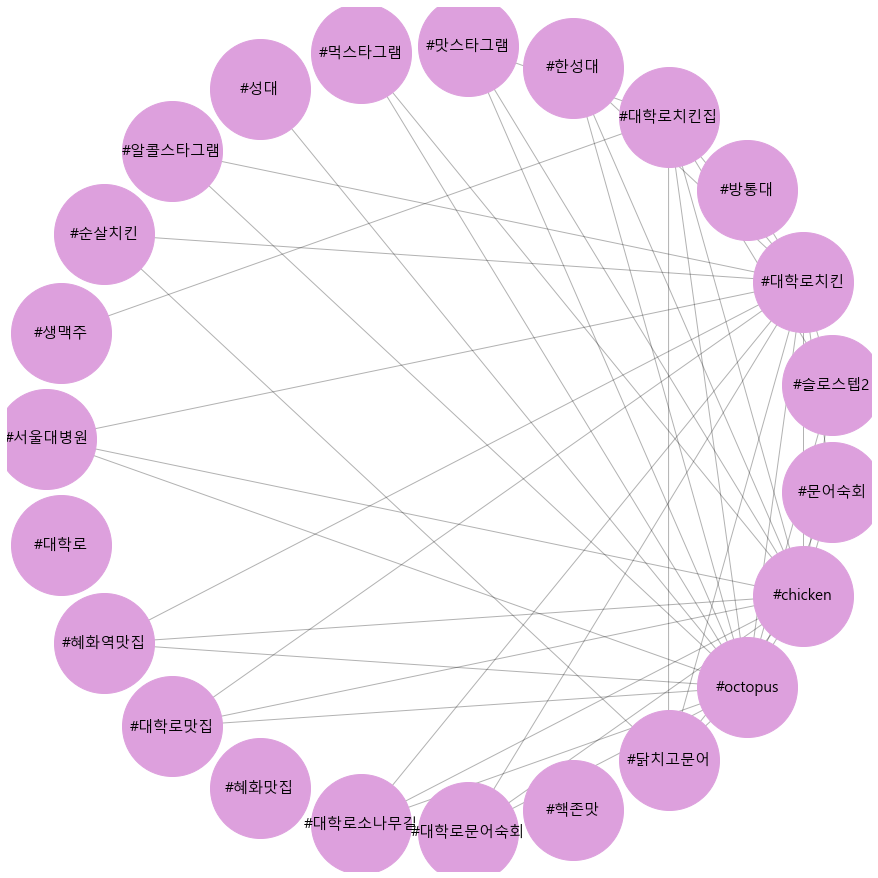

In [230]:
import networkx as nx
#그래프 크기 적용
plt.figure(figsize=(12,12))

#networkx 그래프 객체를 생성
G = nx.Graph()

#node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 '노드' 역할을 하는 원을 생성
for index, row in node_df3.iterrows():
    G.add_node(row['node'],nodesize=row['nodesize'])
    
#network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df3.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'],row['support'])])
#     G.add_weighted_edges_from([(row['source'],row['target2'],row['support'])])
    
#그래프 디자인과 관련된 파라미터를 설정
# pos=nx.spring_layout(G, k=0.6, iterations=10)
pos=nx.shell_layout(G)
# sizes = [G.node['node']['nodesize']*25 for node in G]
nx.draw(G, pos=pos, alpha=0.3)

#그래프 크기 설정
nx.draw_networkx_nodes(G, pos=pos, node_size=10000, node_color="plum", node_shape='o')
# nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=15)

#그래프 출력
ax = plt.gca()
plt.axis('off')
plt.savefig("혜화역3번출구.png", bbox_inches="tight")
plt.show()

# 4번출구

In [86]:
station = '#혜화역4번출구'
location = '#혜화역'
for i in hashtags4:
    if station in i:
        i.remove(station)
    if location in i:
        i.remove(location)
    if 'None' in i:
        i.remove('None')
print(hashtags4)

[['#리얼샷실전양궁', '#데이트팝', '#데이트코스추천', '#혜화데이트코스', '#혜화핫플', '#낙산공원성곽길', '#이화벽화마을', '#다다랩', '#카페몽스', '#재팔이네닭발', '#대학로데이트💕', '#혜화공방', '#혜화놀거리', '#혜화데이트코스'], ['#불난집#대학로맛집#혜화역4번출구#계란말이'], ['#리틀마로니에⠀', '#구가도시건축', '#조정구', '#조지영', '#노선영⠀', '#사진', '#노선영'], ['#꽉찬하루', '#뿌듯', '#인사동', '#간판없는김치찌개집', '#25630보', '#붕어빵', '#안먹음'], ['#궁금한_옆테이블', '#낙원테산도'], ['#바스크치즈케이크', '#아워오후', '#OUROHU'], ['#문화알리미미디어', '#극장동국', '#혜화', '#대학로', '#공연', '#연극', '#드라마극', '#느와르', '#창작극', '#연극추천', '#극단그림일기', '#문화알리미', '#문화알리미_연극', '#배우', '#theater', '#혜화대학로', '#문화', '#예술', '#전시회', '#소통', '#연극그램', '#전시그램', '#창수', '#컴퍼니다옴', '#극단영화', '#대학로연극', '#연극데이트', '#서울데이트', '#혜화연극'], ['#궁금한_옆테이블', '#뎁짜이'], ['#대학로', '#문화와예술이있는곳', '#짚풀생활사박물관', '#프라이빗한공간', '#예약제1인미용실', '#남성컷', '#종로구', '#미용실추천', '#고객만족내기쁨', '#머리고민해결'], ['#혜화역맛집', '#혼가츠대학로점', '#돈까스', '#돈까스맛집', '#돈까스가성비', '#돈까스가성비짱'], ['#대학로네일', '#혜화네일', '#혜화역네일', '#성대네일', '#한성대네일#종로네일#성신여대네일#혜화동네일', '#마로니에공원네일#성균관대네일#종로구네일#동대문네일', '#혜화역4번출구#검정네일#화이트네일#체크네일#큐빅네일#네일아트', '#네일샵', '#네일', '#손젤', '#손관리', 

In [249]:
# 지지도, 신뢰도, 향상도 이상이면서 규칙의 크기가 3이하인 규칙을 추출
results4 = list(apriori(hashtags4,
            min_support=0.05,
            min_confidence=0.05,
            min_lift=0.1,
            max_length=2))
print(results4)

[RelationRecord(items=frozenset({'#대학로'}), support=0.22790883646541382, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#대학로'}), confidence=0.22790883646541382, lift=1.0)]), RelationRecord(items=frozenset({'#대학로맛집'}), support=0.10755697720911635, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#대학로맛집'}), confidence=0.10755697720911635, lift=1.0)]), RelationRecord(items=frozenset({'#맛스타그램'}), support=0.06477409036385445, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#맛스타그램'}), confidence=0.06477409036385445, lift=1.0)]), RelationRecord(items=frozenset({'#먹스타그램'}), support=0.0547780887644942, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#먹스타그램'}), confidence=0.0547780887644942, lift=1.0)]), RelationRecord(items=frozenset({'#혜화'}), support=0.08036785285885646, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#혜화'

In [248]:
columns = ['source','target','support']
network_df4 = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support라는 데이터 프레임의 컬럼으로 변환
for result in results4:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df4.columns)
        network_df4 = network_df4.append(series, ignore_index=True)
network_df4.head()

,source,target,support


In [100]:
from collections import Counter
hashtag4 = sum(hashtags4,[])
count_tags4 = Counter(hashtag4)
print(count_tags4)

Counter({'#대학로': 573, '#대학로맛집': 269, '#혜화': 201, '#혜화맛집': 177, '#맛스타그램': 162, '#먹스타그램': 141, '#꿈이룸대학로점': 122, '#디저트': 121, '#화이팅': 119, '#연극': 113, '#디저트그램': 112, '#대학로데이트': 111, '#카페달콤나무': 111, '#선물스타그램': 111, '#굽스타그램': 111, '#건강간식그램': 109, '#수제청음료': 106, '#맛있는커피': 103, '#홈베이킹그램': 99, '#일상': 98, '#혜화역술집': 93, '#육포차': 89, '#혜화역맛집': 86, '#대학로연극': 79, '#두잇아카펠라': 79, '#대학로네일': 68, '#혜화네일': 68, '#혜화역네일': 66, '#성대네일': 66, '#혜화동맛집': 65, '#핵존맛': 65, '#성대술집#혜화역4번출구#강아지': 64, '#데이트코스': 63, '#가성비갑': 63, '#맥주와음식': 62, '#소통': 61, '#대학로공연': 61, '#아지트혜화': 61, '#단체모임장소': 61, '#마로니에공원': 59, '#맥주집': 59, '#같이사는세상': 59, '#대관': 58, '#감성충전': 58, '#아카펠라공연': 58, '#같이먹자': 58, '#공연': 57, '#대학로술집': 57, '#가심비': 54, '#생일파티': 54, '#아카펠라': 54, '#나도먹고너도먹고': 54, '#네일아트': 53, '#혜화생파': 53, '#혜화가성비': 53, '#혜화단체회식': 53, '#혜화동': 52, '#결혼식뒷풀이': 52, '#혜화동모임장소': 52, '#생맥주무한리필': 52, '#단체석': 51, '#오늘도즐겁게': 48, '#성대포차#혜화역술집#대학로포장마차#대학로포차#성균관대정문': 48, '#혜화핫플': 47, '#대학로카페': 47, '#좋아요': 47, '#파티': 47, '#성균관대': 47, '#혜화카페': 46, '#

In [193]:
# 카운트한 해시태그 데이터 프레임으로 변환
node_df4 = pd.DataFrame(count_tags4.items(), columns=['node','nodesize'])
node_df4 = node_df4[node_df4['nodesize'] >= 100] #시각화의 편의를 위해 'nodesize' 200이하는 제거
node_df4.head()

,node,nodesize
35,#혜화,201
36,#대학로,573
38,#연극,113
110,#대학로데이트,111
143,#먹스타그램,141


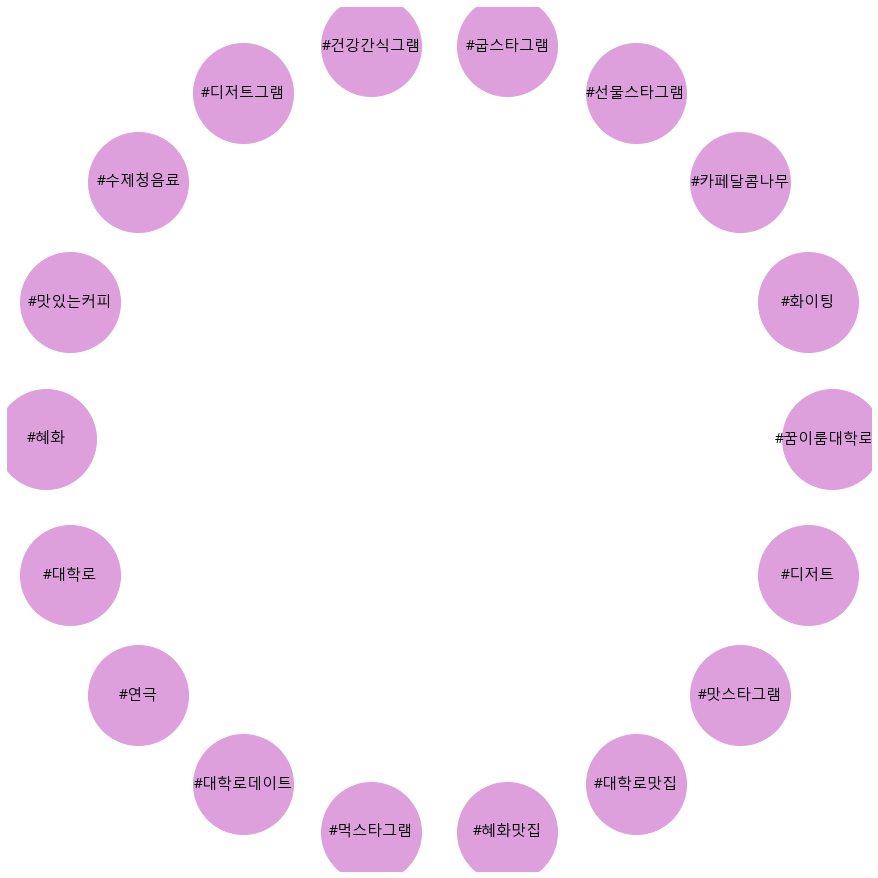

In [200]:
import networkx as nx
#그래프 크기 적용
plt.figure(figsize=(12,12))

#networkx 그래프 객체를 생성
G = nx.Graph()

#node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 '노드' 역할을 하는 원을 생성
for index, row in node_df4.iterrows():
    G.add_node(row['node'],nodesize=row['nodesize'])
    
#network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df4.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'],row['support'])])
    
#그래프 디자인과 관련된 파라미터를 설정
# pos=nx.spring_layout(G, k=0.6, iterations=10)
pos=nx.shell_layout(G)
# sizes = [G.node['node']['nodesize']*25 for node in G]
nx.draw(G, pos=pos, alpha=0.3)

#그래프 크기 설정
nx.draw_networkx_nodes(G, pos=pos, node_size=10000, node_color="plum", node_shape='o')
# nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=15)

#그래프 출력
ax = plt.gca()
plt.axis('off')
plt.savefig("혜화역4번출구.png", bbox_inches="tight")
plt.show() 